In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Load file
df = pd.read_csv(r'C:\Users\Neeraj V N\OneDrive\Desktop\GalTech\House_Price\HousePrice.csv')

# Preview
print(df.head())
print(df.info())


    price  area_sqft  bedrooms  bathrooms  year_built   location  \
0  320000       1450         3        2.0        1998   SouthEnd   
1  455000       1870         4        2.5        2005  NorthDale   
2  285000       1210         2        1.0        1975  WestVilla   
3  510000       2100         3        2.5        2010    OakView   
4  720000       2800         4        3.5        2015  RiverSide   

   distance_to_city_center  has_garage  has_pool  condition  crime_rate  \
0                      5.2           1         0          3         8.7   
1                      3.6           1         0          4         3.2   
2                      7.8           1         0          2        12.5   
3                      2.9           1         0          4         2.8   
4                      2.1           1         1          5         1.5   

   school_rating  
0              6  
1              8  
2              4  
3              9  
4              9  
<class 'pandas.core.frame.

In [6]:
# One-hot encode location
df = pd.get_dummies(df, 'location', drop_first=True)


In [10]:
x = df.drop(['price'], axis= 1)
y = df['price']

xtrain, xtest, ytrain, ytest = train_test_split(x , y, random_state=42, test_size=0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(32, 19)
(8, 19)
(32,)
(8,)


In [11]:
model = LinearRegression()
model.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
prediction = model.predict(xtest)
prediction

array([314389.54307094, 277232.1047995 , 624437.46526975, 414695.01387926,
       745801.2177728 , 242788.93015352, 343190.13924722, 617868.79310748])

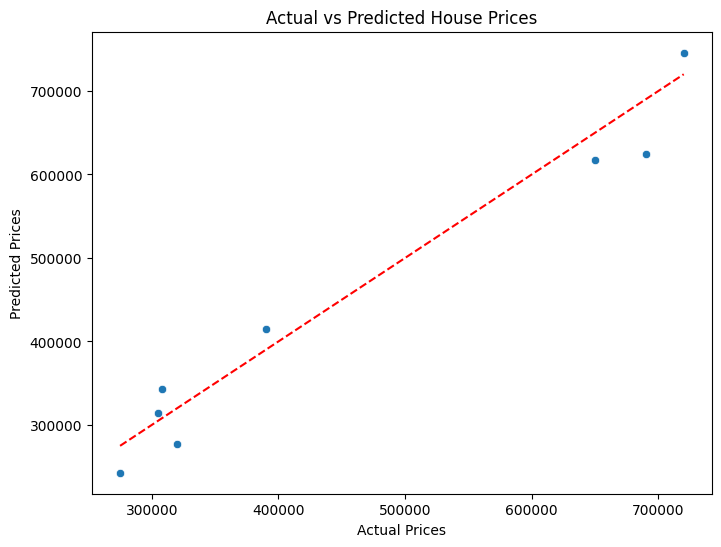

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=ytest, y=prediction)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--')  # reference line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
